## Importar librerías

In [14]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

## Importar funciones personalizadas

In [15]:
%run pandas-missing-extension.ipynb

## Cargar los datos de NHANES

In [16]:
nhanes_raw_df = (
    nhanes.load.load_NHANES_data(year="2017-2018")
    .clean_names(case_type="snake")
)
nhanes_raw_df.shape

(8366, 197)

In [17]:
(
    nhanes_raw_df
    .select_columns(
        "general_health_condition",
        "age_in_years_at_screening",
        "gender",
        "current_selfreported_height_inches",
        "current_selfreported_weight_pounds",
        "doctor_told_you_have_diabetes",
        "60_sec_pulse30_sec_pulse2",
        "total_cholesterol_mgdl"
    )
    .rename_columns(
        {
            "age_in_years_at_screening": "age",
            "current_selfreported_height_inches": "height",
            "current_selfreported_weight_pounds": "weight",
            "doctor_told_you_have_diabetes": "diabetes",
            "60_sec_pulse30_sec_pulse2": "pulse",
            "total_cholesterol_mgdl": "total_cholesterol"
        }
    )
    .replace(
        {
            
        }
    )
)

/home/tux/curso-datos-faltantes-i/env/lib/python3.10/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,general_health_condition,age,gender,height,weight,diabetes,pulse,total_cholesterol
SEQN,,,,,,,,
93703.0,NaN,2.0,Female,NaN,NaN,0,NaN,NaN
93704.0,NaN,2.0,Male,NaN,NaN,0,NaN,NaN
93705.0,Good,66.0,Female,63.0,165.0,0,52.0,157.0
93706.0,Very good,18.0,Male,68.0,145.0,0,82.0,148.0
93707.0,Good,13.0,Male,NaN,NaN,0,100.0,189.0
...,...,...,...,...,...,...,...,...
102952.0,Very good,70.0,Female,NaN,117.0,Borderline,68.0,119.0
102953.0,Fair or,42.0,Male,65.0,218.0,0,78.0,182.0
102954.0,Good,41.0,Female,66.0,150.0,0,78.0,172.0


## Procesar los datos de NHANES

In [18]:
nhanes_raw_df = (
    nhanes.load.load_NHANES_data(year="2017-2018")
    .clean_names(case_type = "snake")
)

nhanes_raw_df.shape

(8366, 197)

In [19]:
nhanes_df = (
    (
        nhanes_raw_df
        .select_columns(
            "general_health_condition",
            "age_in_years_at_screening",
            "gender",
            "current_selfreported_height_inches",
            "current_selfreported_weight_pounds",
            "doctor_told_you_have_diabetes",
            "60_sec_pulse30_sec_pulse2",
            "total_cholesterol_mgdl"
        )
        .rename_columns(
            {
                "general_health_condition" : "condition",
                "age_in_years_at_screening" : "age",
                "current_selfreported_height_inches" : "height",
                "current_selfreported_weight_pounds": "weight",
                "doctor_told_you_have_diabetes": "diabetes",
                "60_sec_pulse30_sec_pulse2": "pulse",
                "total_cholesterol_mgdl": "cholesterol"
            }
        )
        .replace(
            {
                "height": {
                    9999: np.nan,
                    7777: np.nan
                },
                "weight": {
                    9999: np.nan,
                    7777: np.nan
                },
                "diabetes": {
                    "Borderline": np.nan
                }

            }
        )
        .missing.sort_variables_by_missingness()
        .dropna(
            subset = ["diabetes"],
            how = "any"
        )
        .transform_column( #from Janitor
            column_name = "diabetes",
            function = lambda s: s.astype(int),
            elementwise = False
        )
    )
)

nhanes_df

/home/tux/curso-datos-faltantes-i/env/lib/python3.10/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,height,weight,condition,cholesterol,pulse,diabetes,age,gender
SEQN,,,,,,,,
93703.0,NaN,NaN,NaN,NaN,NaN,0,2.0,Female
93704.0,NaN,NaN,NaN,NaN,NaN,0,2.0,Male
93705.0,63.0,165.0,Good,157.0,52.0,0,66.0,Female
93706.0,68.0,145.0,Very good,148.0,82.0,0,18.0,Male
93707.0,NaN,NaN,Good,189.0,100.0,0,13.0,Male
...,...,...,...,...,...,...,...,...
102951.0,NaN,NaN,NaN,NaN,NaN,0,4.0,Male
102953.0,65.0,218.0,Fair or,182.0,78.0,0,42.0,Male
102954.0,66.0,150.0,Good,172.0,78.0,0,41.0,Female


## Visualizar los valores faltantes

<Axes: >

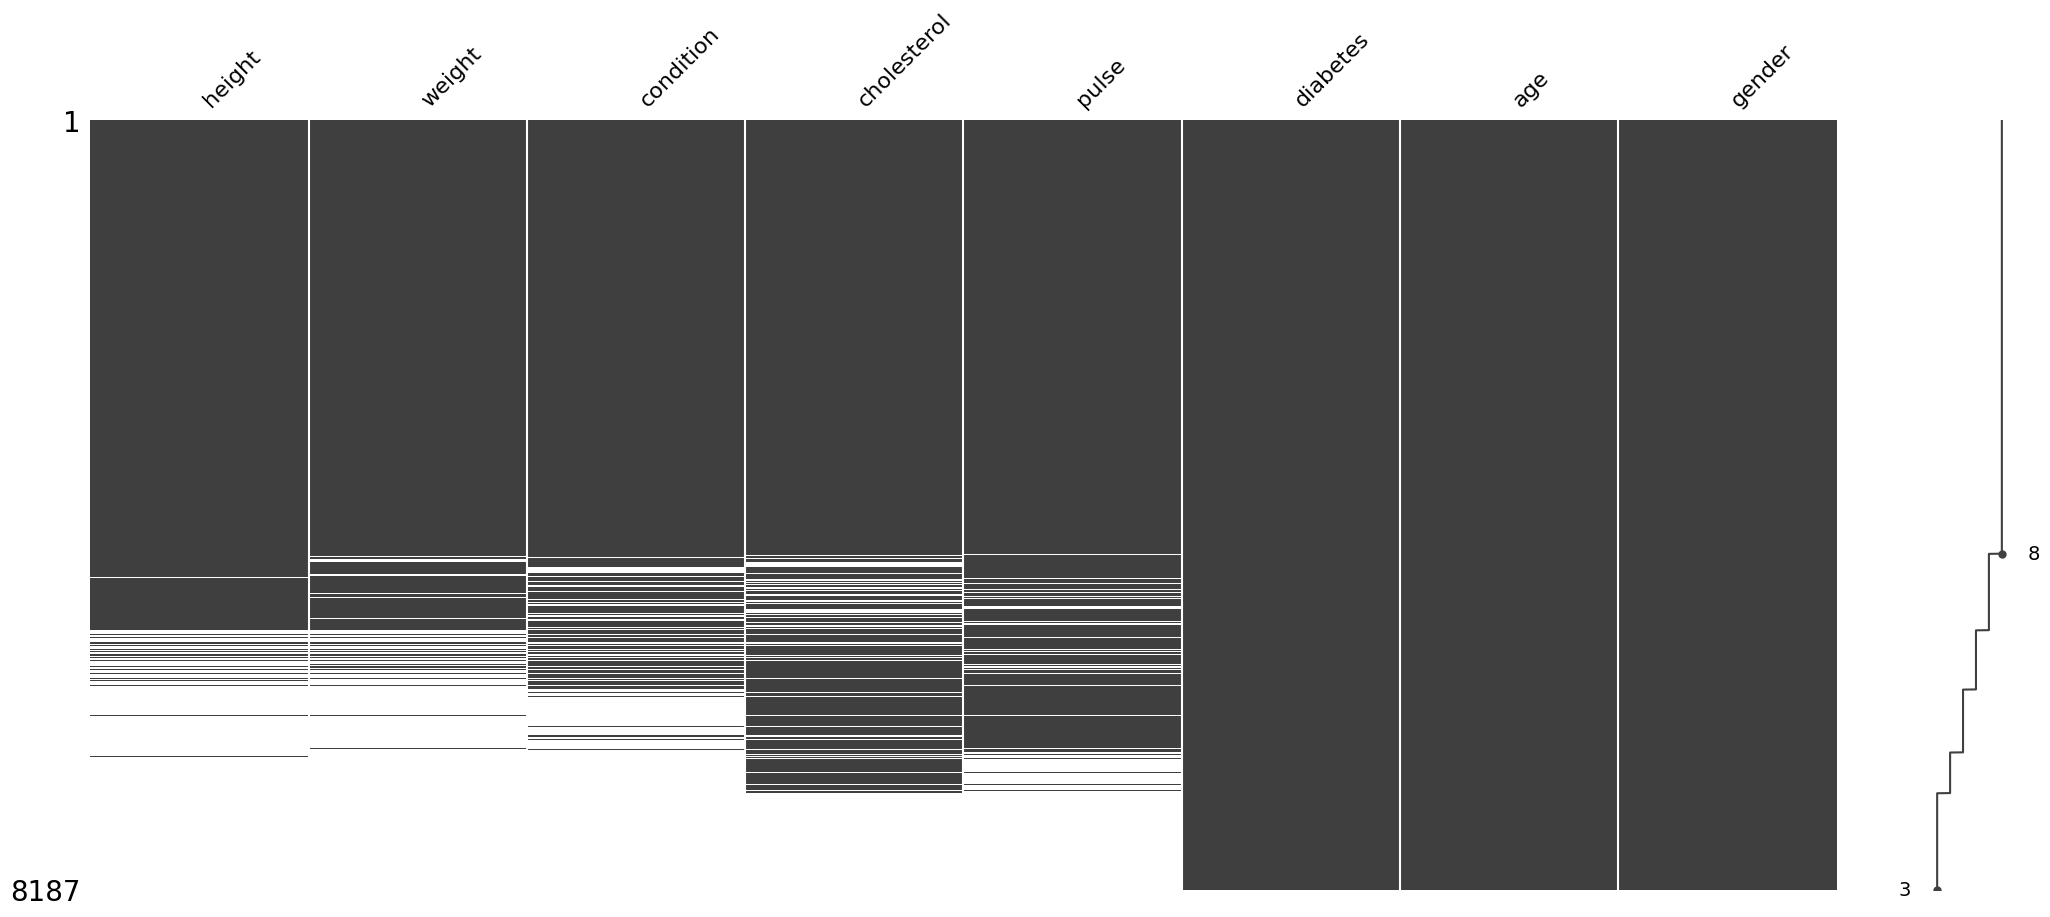

In [20]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort="descending")
)

/home/tux/curso-datos-faltantes-i/env/lib/python3.10/site-packages/upsetplot/plotting.py:580: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  window_extent_args["renderer"] = get_renderer(fig)
/home/tux/curso-datos-faltantes-i/env/lib/python3.10/site-packages/upsetplot/plotting.py:586: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  window_extent_args["renderer"] = get_renderer(fig)


{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

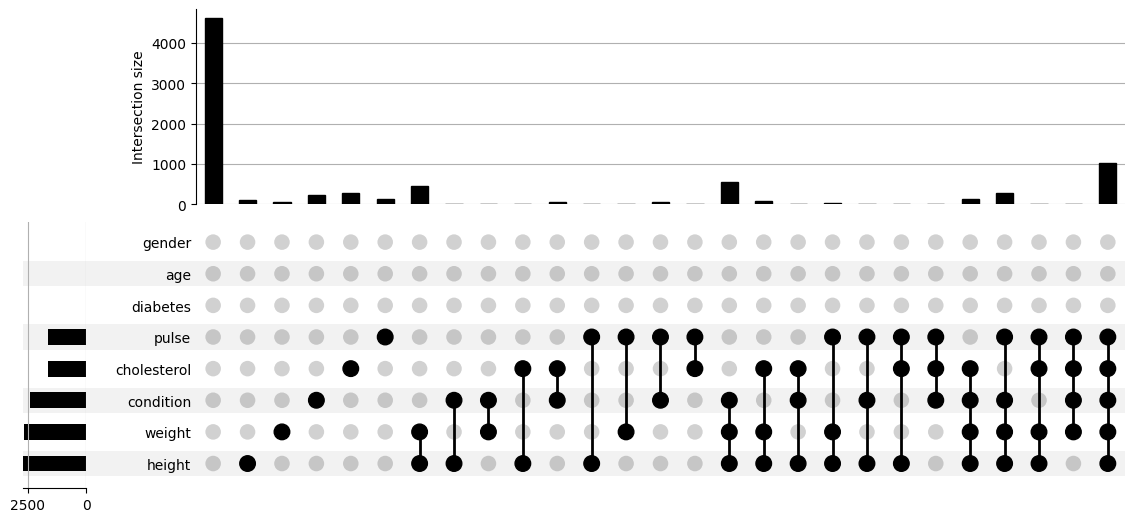

In [21]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .missing.missing_upsetplot()
)

<Axes: >

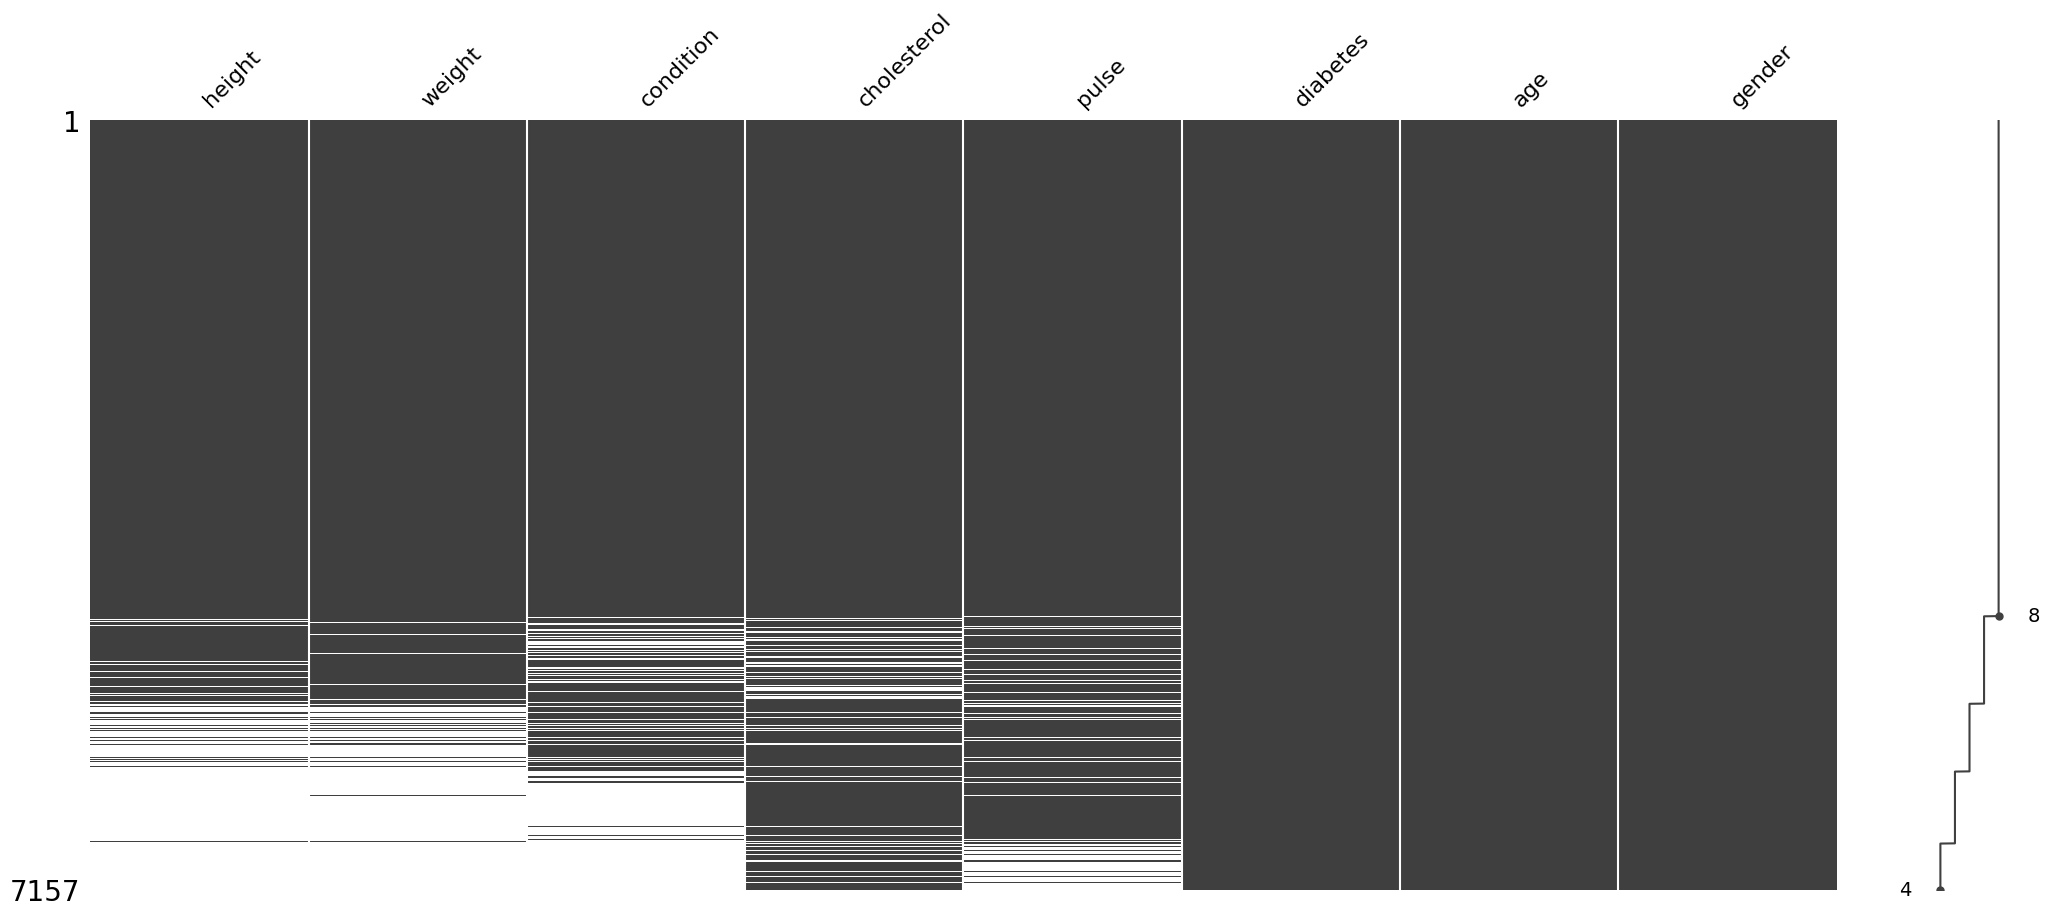

In [22]:
(
    nhanes_df
    .dropna(
        subset = ["pulse", "cholesterol", "condition", "weight", "height"],
        how = "all"
    )
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort="descending")
)

## Eliminar valores faltantes

In [23]:
nhanes_df = (
    nhanes_df
    .dropna(
        subset = ["pulse", "cholesterol", "condition", "weight", "height"],
        how = "all"
    )
    .missing.sort_variables_by_missingness()
)

nhanes_df.shape


(7157, 8)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdf84ff9-f66c-44c7-a67c-ca1115a2b683' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>